Importing Essential libraries


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [81]:
path = "Mall_Customers.csv"
df = pd.read_csv(path)
print(df.head(10))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72


In [82]:
df.shape

(200, 5)

In [83]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [84]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
text_columns = df.select_dtypes(include =['object']).columns
print(f"Text columns to encoded : {list(text_columns)}")
for col in text_columns:
    df[col] = le.fit_transform(df[col])
    print(f"Encoded {col}")
    

Text columns to encoded : ['Gender']
Encoded Gender


In [86]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


In [87]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

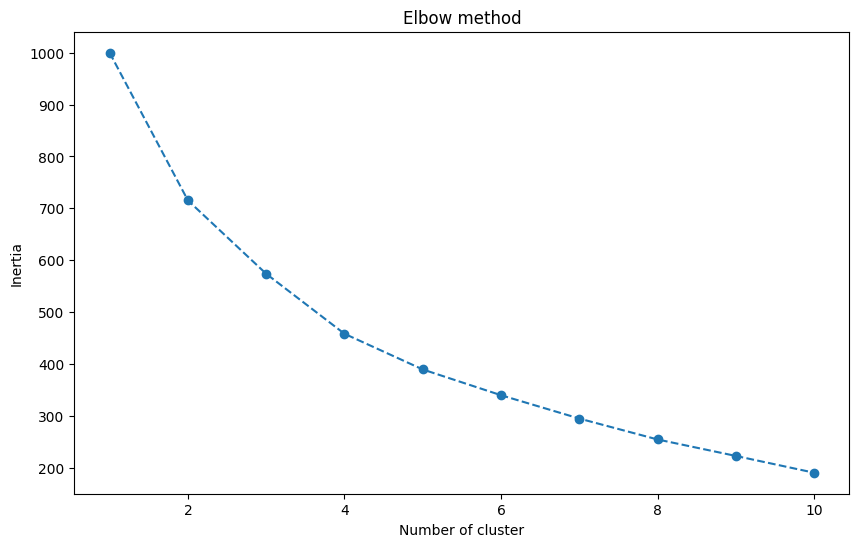

In [88]:
inertia = []
k_means = range(1 ,11)
for k in k_means:
    kmeans = KMeans(n_clusters=k ,random_state= 42 , n_init= 10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10 ,6))
plt.plot(k_means ,inertia ,marker = 'o' ,linestyle = "--")
plt.title("Elbow method") 
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()   

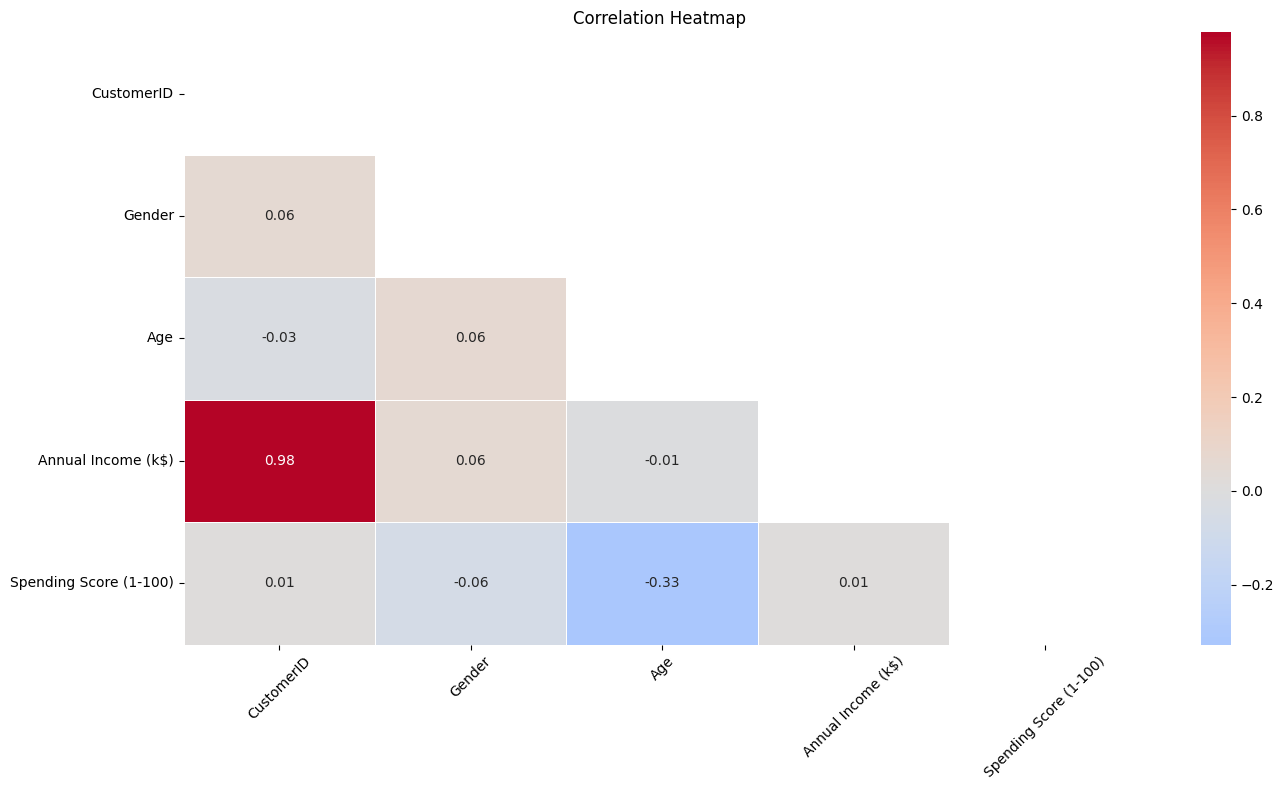

In [89]:
plt.figure(figsize= (14, 8))
correlation_matrix = df.corr()

mask = np.triu(np.ones_like(correlation_matrix ,dtype= bool))
sns.heatmap (correlation_matrix , mask = mask , annot = True ,cmap = 'coolwarm', fmt = ".2f", linewidth = 0.5, center= 0)
plt.title("Correlation Heatmap ")
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()


In [90]:
optimal_k = 3
kmeans = KMeans(n_clusters= optimal_k , random_state= 42 , n_init = 10)
clusters = kmeans.fit_predict(scaled_data)
df['clusters'] = clusters 



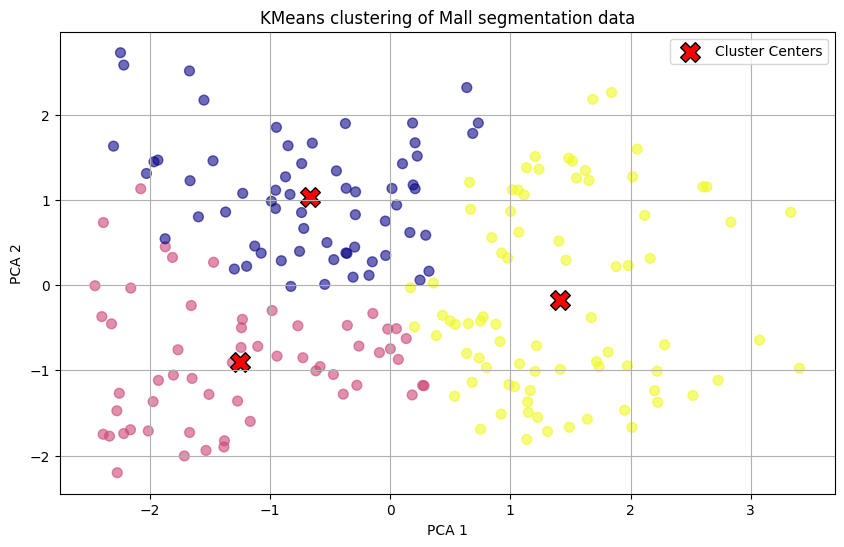

In [94]:
pca= PCA(n_components = 2)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_result , columns= ['PC1' ,'PC2'])
pca_df['cluster'] = clusters

plt.figure(figsize= (10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df["PC2"], cmap = 'plasma' ,s = 50 , alpha = 0.6 , c= pca_df['cluster'])
plt.title("KMeans clustering of Mall segmentation data")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=200, label='Cluster Centers', edgecolor='black')
plt.legend()
plt.grid(True)
plt.show()

In [95]:

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"\nSilhouette Score: {silhouette_avg:.3f}")

print("CLUSTER INTERPRETATION:")

if 'Age' in df.columns and 'Annual Income (k$)' in df.columns:
    for cluster in sorted(df['clusters'].unique()):
        cluster_data = df[df['clusters'] == cluster]
        print(f"cluster {cluster}:")
        print(f"  - Size: {len(cluster_data)} customers")
        print(f"  - Avg Age: {cluster_data['Age'].mean():.1f} years")
        print(f"  - Avg Income: ${cluster_data['Annual Income (k$)'].mean():.1f}k")
        print(f"  - Avg Spending Score: {cluster_data['Spending Score (1-100)'].mean():.1f}")
        print()


Silhouette Score: 0.255
CLUSTER INTERPRETATION:
cluster 0:
  - Size: 63 customers
  - Avg Age: 54.7 years
  - Avg Income: $49.5k
  - Avg Spending Score: 40.6

cluster 1:
  - Size: 57 customers
  - Avg Age: 26.1 years
  - Avg Income: $37.5k
  - Avg Spending Score: 57.9

cluster 2:
  - Size: 80 customers
  - Avg Age: 35.4 years
  - Avg Income: $85.7k
  - Avg Spending Score: 52.3



In [93]:
df['Cluster'] = clusters

cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         73.253968  0.460317  54.714286           49.492063   
1         47.631579  0.350877  26.105263           37.491228   
2        159.625000  0.487500  35.437500           85.712500   

         Spending Score (1-100)  clusters  
Cluster                                    
0                     40.571429       0.0  
1                     57.912281       1.0  
2                     52.287500       2.0  
